¿Cuál de los modelos (Bayes Ingenuo Gaussiano o KNN) proporciona una mayor precisión para predecir la malignidad de los tumores en el conjunto de datos "Breast Cancer Wisconsin"?

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Bayes Ingenuo Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Crear y entrenar el modelo K Vecinos Más Cercanos con un mayor número de vecinos
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluar y comparar el rendimiento de los modelos
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Mostrar resultados
print(f"Accuracy Bayes Ingenuo Gaussiano: {accuracy_gnb:.2f}")
print(f"Accuracy K Vecinos Más Cercanos: {accuracy_knn:.2f}")

# Mostrar el informe de clasificación para ambos modelos
print("\nClassification Report Bayes Ingenuo Gaussiano:\n")
print(classification_report(y_test, y_pred_gnb, target_names=data.target_names))

print("\nClassification Report K Vecinos Más Cercanos:\n")
print(classification_report(y_test, y_pred_knn, target_names=data.target_names))

# Mostrar la matriz de confusión para ambos modelos
print("\nConfusion Matrix Bayes Ingenuo Gaussiano:\n")
print(confusion_matrix(y_test, y_pred_gnb))

print("\nConfusion Matrix K Vecinos Más Cercanos:\n")
print(confusion_matrix(y_test, y_pred_knn))

# Interpretación de resultados específicos
def interpret_results(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"\nInterpretación de resultados para {model_name}:\n")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")

# Interpretar los resultados de ambos modelos
interpret_results(y_test, y_pred_gnb, "Bayes Ingenuo Gaussiano")
interpret_results(y_test, y_pred_knn, "K Vecinos Más Cercanos")


Accuracy Bayes Ingenuo Gaussiano: 0.94
Accuracy K Vecinos Más Cercanos: 0.93

Classification Report Bayes Ingenuo Gaussiano:

              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        63
      benign       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


Classification Report K Vecinos Más Cercanos:

              precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        63
      benign       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171


Confusion Matrix Bayes Ingenuo Gaussiano:

[[ 57   6]
 [  4 104]]

Confusion Matrix K Vecinos Más Cercanos:

[[60  3]
 [ 9 99]]

Interpretación de resultados para Bayes In

Usando StandardScaler, que es una técnica común que ayuda a que los datos tengan una distribución normalizada con media 0 y desviación estándar 1. Esto suele beneficiar al modelo Bayesiano y no afecta negativamente a K-NN.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Bayes Ingenuo Gaussiano
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Crear y entrenar el modelo K Vecinos Más Cercanos con un mayor número de vecinos
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluar y comparar el rendimiento de los modelos
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Mostrar resultados
print(f"Accuracy Bayes Ingenuo Gaussiano: {accuracy_gnb:.2f}")
print(f"Accuracy K Vecinos Más Cercanos: {accuracy_knn:.2f}")

# Mostrar el informe de clasificación para ambos modelos
print("\nClassification Report Bayes Ingenuo Gaussiano:\n")
print(classification_report(y_test, y_pred_gnb, target_names=data.target_names))

print("\nClassification Report K Vecinos Más Cercanos:\n")
print(classification_report(y_test, y_pred_knn, target_names=data.target_names))

# Mostrar la matriz de confusión para ambos modelos
print("\nConfusion Matrix Bayes Ingenuo Gaussiano:\n")
print(confusion_matrix(y_test, y_pred_gnb))

print("\nConfusion Matrix K Vecinos Más Cercanos:\n")
print(confusion_matrix(y_test, y_pred_knn))

# Interpretación de resultados específicos
def interpret_results(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"\nInterpretación de resultados para {model_name}:\n")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")

# Interpretar los resultados de ambos modelos
interpret_results(y_test, y_pred_gnb, "Bayes Ingenuo Gaussiano")
interpret_results(y_test, y_pred_knn, "K Vecinos Más Cercanos")


Accuracy Bayes Ingenuo Gaussiano: 0.94
Accuracy K Vecinos Más Cercanos: 0.95

Classification Report Bayes Ingenuo Gaussiano:

              precision    recall  f1-score   support

   malignant       0.92      0.90      0.91        63
      benign       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Classification Report K Vecinos Más Cercanos:

              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        63
      benign       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Confusion Matrix Bayes Ingenuo Gaussiano:

[[ 57   6]
 [  5 103]]

Confusion Matrix K Vecinos Más Cercanos:

[[ 59   4]
 [  4 104]]

Interpretación de resultados para Baye

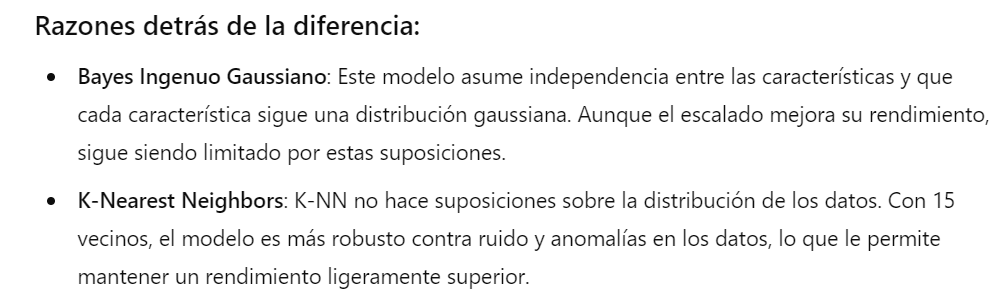

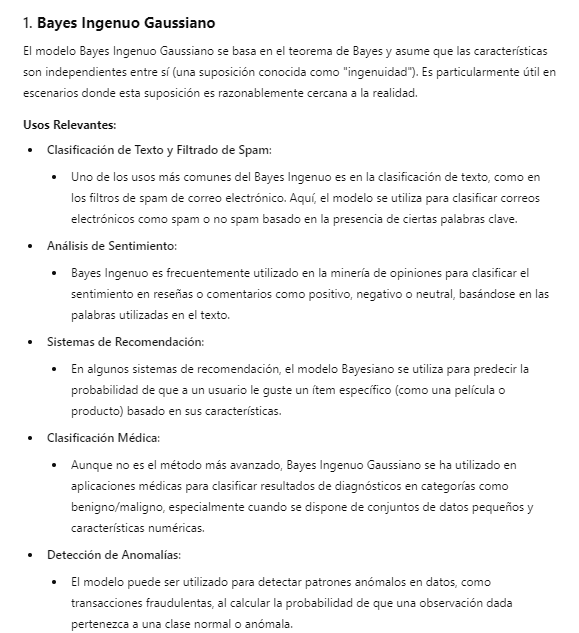

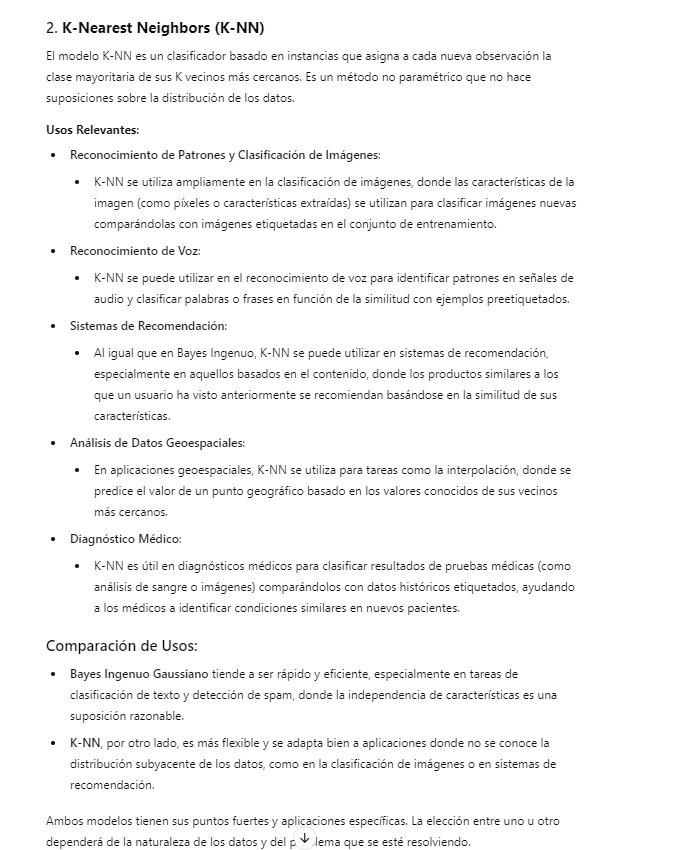